<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/articulos/regresion_lineal_por_minimos_cuadrados_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression from Scratch with Python: OLS Explained
Regresión Lineal desde cero con Python: Mínimos Cuadrados paso a paso

La regresión lineal es el algoritmo fundamental en Data Science, y en este artículo aprenderás a construirlo desde cero. Combinamos teoría accesible con código práctico para que entiendas **por qué funciona** y **cómo implementarlo** paso a paso.

Al final de este artículo, tendrás un modelo de regresión lineal funcionando y visualizado, listo para hacer predicciones.

---


# **1. Introducción**

En Machine Learning, se aconseja comenzar programando un algoritmo de regresión lineal, ya que además de formativo se continúa usando a nivel empresarial en Data Science. Pero ¿por qué sigue siendo tan relevante en la era de los chatbots y las redes neuronales?

La respuesta es simple: **efectividad y interpretabilidad**. Mientras que modelos más complejos pueden actuar como "cajas negras", la regresión lineal nos permite entender exactamente cómo cada variable afecta a nuestro resultado. Es nuestro punto de partida natural para cualquier problema de predicción numérica.

## ¿Qué problema resuelve realmente?

Imagina que tienes datos históricos de precios de viviendas y quieres predecir cuánto costará una nueva casa. Tienes variables como metros cuadrados, número de habitaciones, ubicación... La regresión lineal te permite encontrar una relación matemática entre estas características y el precio.

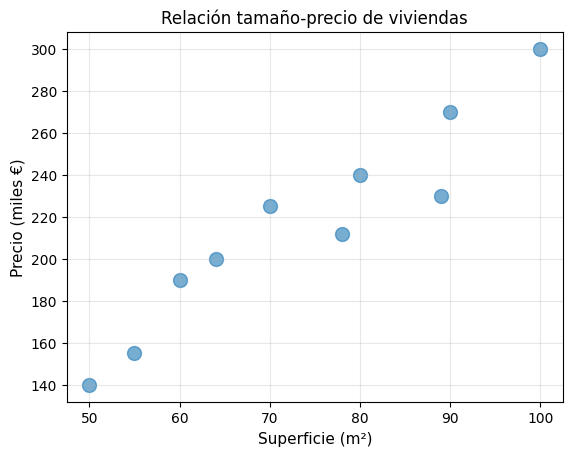

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de casa vs precio
superficie = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([140000, 155000, 190000, 200000, 225000,
                   212000 ,240000, 230000 ,270000, 300000])

plt.scatter(superficie, precio/1000, alpha=0.6, s=100)
plt.xlabel('Superficie (m²)', fontsize=11)
plt.ylabel('Precio (miles €)', fontsize=11)
plt.title('Relación tamaño-precio de viviendas', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El **método de mínimos cuadrados** (Ordinary Least Squares, OLS) resuelve un problema aparentemente sencillo: dada una nube de puntos, queremos encontrar la recta (o hiperplano) que mejor se ajuste a los datos. "Mejor" aquí significa minimizar la suma de los errores cuadráticos entre las predicciones y los valores reales.

# **2. Planteamiento general del problema de Regresión**

Ahora que entendemos por qué la regresión lineal es tan útil, vamos a formalizar matemáticamente el problema. Comenzaremos con el caso más simple de una sola variable ($x$) para construir la intuición antes de generalizar al caso multivariable.

## Caso simple: una variable independiente

Empecemos con lo básico. Cuando tenemos solo una variable predictora $x$, queremos encontrar la recta que mejor se ajuste a nuestros datos:

$$
\begin{array}{lcl}
y = w_0 + w_1 x + e         & \longrightarrow & \text{modelo real con error} \\
\hat{y} = w_0 + w_1 x       & \longrightarrow & \text{modelo estimado}
\end{array}
$$

Donde:
- $\hat{y}$ → el **valor predicho** por el modelo, es la $y$ estimada (precio)
- $x$ → variable predictora (superficie)
- $w_0$ → **intercepto** (término independiente o bias)
- $w_1$ → **pendiente** (coeficiente de la variable)
- $e$ → **error o residuo**: la diferencia entre el valor real y lo que predice el modelo

El error de cada predicción es:

\begin{align*}
e_i &= y_i - \hat{y}_i \\
e_i &= y_i - (w_0 + w_1 x_i)
\end{align*}


Nuestro objetivo es encontrar $w_0$ y $w_1$ que minimicen estos errores.

## El método de Mínimos Cuadrados

En lugar de usar los errores directamente trabajamos con los **errores al cuadrado**. Definimos la función de coste:

$$J(w_0, w_1) = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} [y_i - (w_0 + w_1 x_i)]^2$$

**¿Por qué al cuadrado?** Por tres razones principales:
- Evita que errores positivos y negativos se cancelen
- Penaliza más los errores grandes (lo que suele ser deseable)
- Obtenemos una función diferenciable y convexa, lo que facilita encontrar el mínimo

### El Error Cuadrático Medio (MSE)

La función $J(w)$ simplemente suma los errores al cuadrado, pero si calculamos la media habremos obtenido el Error Cuadrático Medio (MSE).

$$\text{MSE}(w) = \frac{1}{n} \sum_{i=1}^{n}e_i^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - (w_0 + w_1 x_i))^2$$




Veámoslo gráficamente con nuestros datos de viviendas:

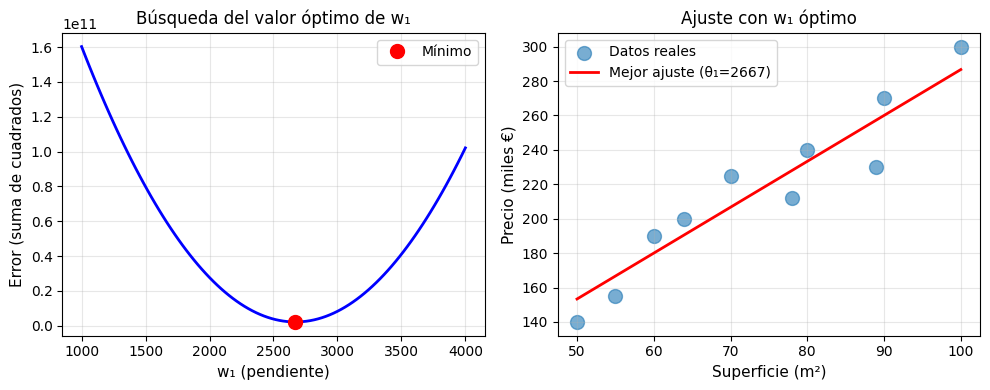


w₁ óptimo encontrado: 2666.67€/m²
Error mínimo (MSE): 2.16e+09


In [10]:
# Visualización de cómo varía el error con diferentes valores de w1
def calcular_error(w0, w1, x, y):
    y_pred = w0 + w1 * x
    return np.sum((y - y_pred)**2)

# Calculamos el error para diferentes valores de w1
w1_vals = np.linspace(1000, 4000, 100)
w0_fijo = 20_000  # Valor fijado arbitrariamene para visualización
errores = [calcular_error(w0_fijo, w1, superficie, precio) for w1 in w1_vals]

plt.figure(figsize=(10, 4))

# Gráfico del error vs w1
plt.subplot(1, 2, 1)
plt.plot(w1_vals, errores, 'b-', linewidth=2)
min_idx = np.argmin(errores)
plt.plot(w1_vals[min_idx], errores[min_idx], 'ro', markersize=10, label='Mínimo')
plt.xlabel('w₁ (pendiente)', fontsize=11)
plt.ylabel('Error (suma de cuadrados)', fontsize=11)
plt.title('Búsqueda del valor óptimo de w₁', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Gráfico con mejor ajuste
plt.subplot(1, 2, 2)
mejor_w1 = w1_vals[min_idx]
y_pred = w0_fijo + mejor_w1 * superficie
plt.scatter(superficie, precio/1000, alpha=0.6, s=100, label='Datos reales')
plt.plot(superficie, y_pred/1000, 'r-', linewidth=2, label=f'Mejor ajuste (θ₁={mejor_w1:.0f})')
plt.xlabel('Superficie (m²)', fontsize=11)
plt.ylabel('Precio (miles €)', fontsize=11)
plt.title('Ajuste con w₁ óptimo', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nw₁ óptimo encontrado: {mejor_w1:.2f}€/m²")
print(f"Error mínimo (MSE): {errores[min_idx]:.2e}")

### Visualización de los errores

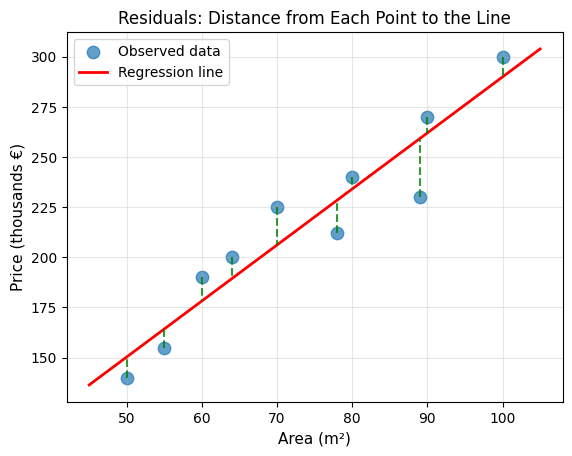

In [12]:
plt.scatter(superficie, precio/1000, alpha=0.7, s=80, label='Observed data')

# First we calculate the coefficients for the line
X = np.column_stack([np.ones(len(superficie)), superficie])  # add column of 1s for bias
w = np.linalg.inv(X.T @ X) @ X.T @ precio

# Regression line
area_range = np.linspace(45, 105, 100)
price_range = w[0] + w[1] * area_range
plt.plot(area_range, price_range/1000, 'r-', linewidth=2, label='Regression line')

# Vertical lines showing the errors
for xi, yi in zip(superficie, precio):
    yi_pred = w[0] + w[1] * xi
    plt.plot([xi, xi], [yi/1000, yi_pred/1000], 'g--', alpha=0.8)

plt.xlabel('Area (m²)', fontsize=11)
plt.ylabel('Price (thousands €)', fontsize=11)
plt.title('Residuals: Distance from Each Point to the Line', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Cada línea discontinua representa un error $e_i$. El método de mínimos cuadrados encuentra la recta que **minimiza la suma de los cuadrados de todas estas distancias verticales**.

---
### Minimizando el error

El método encuentra los valores óptimos derivando e igualando a cero:

$$\frac{\partial J}{\partial w_0} = 0, \quad \frac{\partial J}{\partial w_1} = 0$$

Esto nos da las **ecuaciones normales**, cuya solución es:

$$w_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$w_0 = \bar{y} - w_1 \bar{x}$$

Donde $\bar{x}$ y $\bar{y}$ son las medias de $x$ e $y$ respectivamente.

### La fuerza de la relación lineal: el coeficiente de correlación $ r $

Para evaluar nuestro modelo, es útil preguntarnos: **¿hasta qué punto están relacionadas linealmente $x$ e $y$?**

El **coeficiente de correlación lineal $r$** mide precisamente eso: la **fuerza y dirección** de la relación lineal entre dos variables. Su valor está siempre entre $-1$ y $1$:
- $r = 1$: relación lineal positiva perfecta (al aumentar $x$, $y$ aumenta proporcionalmente)
- $r = -1$: relación lineal negativa perfecta
- $r = 0$: no hay relación lineal
- $|r|$ cercano a 1 → relación fuerte
- $|r|$ cercano a 0 → relación débil

En regresión lineal, el coeficiente de correlación lineal $r$ se define como el cociente entre la covarianza de las dos variables y el producto de sus desviaciones estándar. La covarianza mide cómo varían juntas las dos variables.

Matemáticamente,

$$
r = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y}
$$

Desarrollando la fórmula obtenemos:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

> **Nota intuitiva**: El numerador mide cómo se mueven juntas las desviaciones de $x$ e $ y$ respecto a sus medias. Si siempre suben o bajan juntas, $r$ será alto. Si no, se cancelan y $r$ será bajo. Luego se divide entre el producto de las desviaciones para estandarizar entre -1 y 1.

Este $r$ es especialmente útil **antes de ajustar el modelo**: si $|r|$ es muy bajo, ya sabemos que una recta no capturará bien la relación entre las variables.

Estas fórmulas funcionan perfectamente para una variable independiente $X$, pero ¿qué pasa cuando tenemos múltiples características? Aquí es donde la notación matricial se vuelve indispensable.

## Generalización a múltiples variables: notación matricial

Cuando tenemos múltiples variables predictoras $(x_1, x_2, \dots, x_n)$, el modelo se extiende naturalmente. En lugar de una recta, ahora buscamos un **hiperplano**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

Aquí es donde la **notación matricial** hace la vida más fácil. Representamos nuestros datos como:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_n
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}$$

**¡Ojo con la columna de unos!** Es crucial incluirla en $\mathbf{X}$ para representar el término independiente $w_0$.

Nuestro modelo se escribe elegantemente como:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$

Y la solución óptima viene dada por las **ecuaciones normales** en forma matricial:

$$\boxed{\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}}$$

Esta fórmula nos da directamente los coeficientes óptimos sin necesidad de iterar. ¡Es como tener la respuesta de un problema de optimización sin tener que buscarla!

**¿Por qué esta notación es tan poderosa?** Porque nos permite tratar casos simples y complejos con el mismo framework matemático, y porque las operaciones matriciales son computacionalmente eficientes en NumPy.

---

# **3. Implementación con Mínimos Cuadrados**

## De la teoría a la práctica

Procedemos a implementar la solución de mínimos cuadrados desde cero, aplicando los conceptos teóricos desarrollados anteriormente a nuestro dataset de precios de viviendas.

La formulación matricial que derivamos:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Se implementa eficientemente utilizando operaciones matriciales en NumPy.

## Construcción de la matriz de diseño

La implementación correcta requiere incluir una columna de unos para el término independiente:

In [ ]:
# Usamos los datos de precio y superficie del ejemplo inicial

# Matriz X con columna de unos para el intercept
X = np.column_stack([np.ones(len(superficie)), superficie])
y = precio

print("Matriz de diseño X:")
print(X)
print(f"\nDimensiones: {X.shape} - {X.shape[0]} observaciones, {X.shape[1]} características")

## Implementación del algoritmo
Ahora que entendemos la teoría, implementémos en código la expresión matricial.

In [ ]:
def minimos_cuadrados(X, y):
    """Calcula los coeficientes óptimos usando mínimos cuadrados ordinarios"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Cálculo de coeficientes
w = minimos_cuadrados(X, y)

print("Coeficientes del modelo:")
print(f"w_0 (intercept): {w[0]:.2f} €")
print(f"w_1 (pendiente): {w[1]:.2f} €/m²")

**Interpretación de coeficientes:**
- **Pendiente (2,791.81 €/m²)**: Por cada metro cuadrado adicional, el precio aumenta aproximadamente 2,792 €
- **Intercept (10,722.85 €)**: Representa el valor base de la vivienda (cuando la superficie es 0 m²)

## Visualización del ajuste

In [ ]:
# Predicciones del modelo
precio_predicho = X @ w

# Visualización
plt.scatter(superficie, precio/1000, alpha=0.7, s=80, label='Datos observados')

# Recta de regresión
superficie_range = np.linspace(45, 105, 100)
precio_range = w[0] + w[1] * superficie_range
plt.plot(superficie_range, precio_range/1000, 'r-', linewidth=2,
         label='Recta de regresión')

plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Ajuste por Mínimos Cuadrados: Predicción vs Realidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---

## Resumen

Hemos implementado con éxito un modelo de regresión lineal desde cero usando el método de mínimos cuadrados. Ahora tienes:

- Un modelo que predice precios basándose en la superficie
- Visualización clara del ajuste a los datos
- Comprensión de la formulación matricial

**¿Y ahora qué?** Nuestro modelo hace predicciones, pero ¿cómo sabes si son buenas? ¿Cuándo deberías usar este método y cuándo no? ¿Cómo se compara con implementaciones profesionales?

Estas preguntas críticas se responden en el siguiente artículo, donde evaluaremos el rendimiento del modelo y exploraremos sus ventajas, limitaciones y casos de uso apropiados.


#### Etiqutas para el blog

```txt
#Python
#DataScience
#MachineLearning
#LinearRegression
#OLS
#NumPy
#DataAnalysis
#Statistics
#Coding
#Tutorial
#DataVisualization
```